In [1]:
import numpy as np
import matplotlib.pyplot as plt
import BayesianNeuralNetwork as BNN

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
/home/rosgori/Python/pymc3_env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# 1. generate a simple non-linear function
X = np.reshape(np.arange(-5.0, 5.0, 0.01), [-1, 1])

print( "shape of X: ", X.shape)

Y = X ** 2.0

shape of X:  (1000, 1)


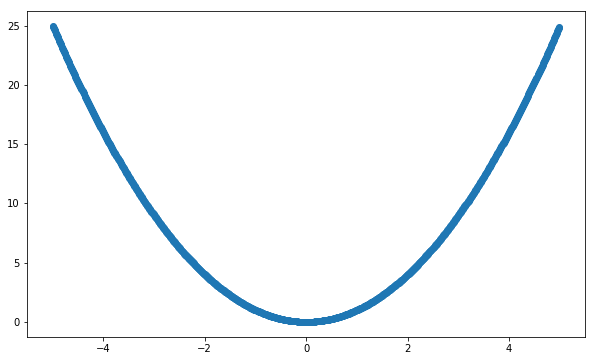

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y)
plt.show()

In [6]:
# 2. neural network
print("Building neural network...")

nn = BNN.BayesianNeuralNetwork([5, 5], inference_method='mcmc')
nn.fit(X, Y, samples=200)
y_preds = nn.predict(X)
RMSD = nn.RMSD(X, Y)

print( "Root Mean Square deviation:", RMSD)

Building neural network...


Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [bias_out, out, layer1, bias1, layer0, bias0]
Sampling 4 chains: 100%|██████████| 1600/1600 [03:35<00:00,  1.78draws/s]
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 34 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.910505392

Root Mean Square deviation: 0.03177653034901077


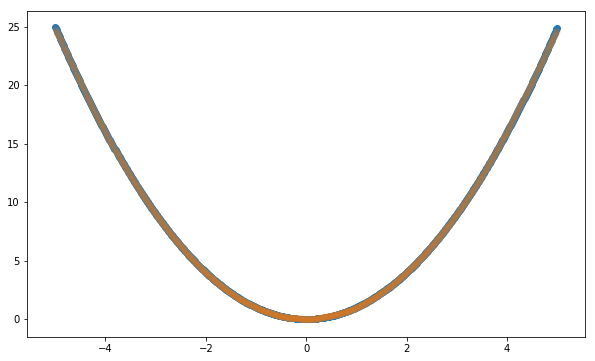

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.scatter(X, y_preds, alpha=0.1)
plt.show()